In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [2]:
print (tf.__version__)

2.0.0-rc1


In [3]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

In [4]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255
print (x_train_scaled.shape)

K = len(set(y_train.flatten()))
print (K)

(50000, 32, 32, 3)
10


In [5]:
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense, MaxPool2D, BatchNormalization
from tensorflow.keras.models import Model

In [6]:
i = Input(shape=x_train_scaled[0].shape)
x = Conv2D(filters=32, kernel_size=(2,2), strides=2, activation='relu')(i)
x = BatchNormalization()(x)
x = Conv2D(filters=64, kernel_size=(2,2), strides=2, activation='relu')(x)
x = BatchNormalization()(x)
x = Conv2D(filters=128, kernel_size=(2,2), strides=2, activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2,2))(x)
x = Flatten()(x)
x = Dense(200, activation='relu')(x)
o = Dense(K, activation='softmax')(x)

model = Model(i,o)
model.summary()
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 16, 16, 32)        416       
_________________________________________________________________
batch_normalization (BatchNo (None, 16, 16, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 64)          256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         32896     
_________________________________________________________________
batch_normalization_2 (Batch (None, 4, 4, 128)         512   

In [7]:
history = model.fit(x_train_scaled, y_train, epochs=30, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/30
40000/40000 [==============================] - 25s 623us/sample - loss: 1.5512 - accuracy: 0.4433 - val_loss: 1.3999 - val_accuracy: 0.4962
Epoch 2/30
40000/40000 [==============================] - 22s 561us/sample - loss: 1.2464 - accuracy: 0.5543 - val_loss: 1.2743 - val_accuracy: 0.5494
Epoch 3/30
40000/40000 [==============================] - 24s 608us/sample - loss: 1.1004 - accuracy: 0.6030 - val_loss: 1.1907 - val_accuracy: 0.5755
Epoch 4/30
40000/40000 [==============================] - 30s 749us/sample - loss: 0.9894 - accuracy: 0.6464 - val_loss: 1.2509 - val_accuracy: 0.5685
Epoch 5/30
40000/40000 [==============================] - 26s 645us/sample - loss: 0.8914 - accuracy: 0.6810 - val_loss: 1.1081 - val_accuracy: 0.6131
Epoch 6/30
40000/40000 [==============================] - 21s 533us/sample - loss: 0.8017 - accuracy: 0.7138 - val_loss: 1.1748 - val_accuracy: 0.5955
Epoch 7/30
40000/40000 [====================

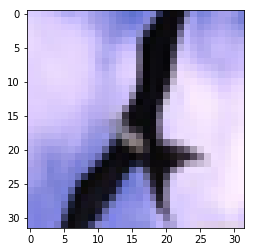

predicted label is: 2
actual label is: [2]


In [9]:
import matplotlib.pyplot as plt

imgNum = np.random.randint(0,1000)
plt.imshow(x_test_scaled[imgNum])
plt.show()

tstimg = x_test_scaled[imgNum].reshape(1,32, 32, 3)
predlbl = model.predict(tstimg)
print ('predicted label is:', predlbl.argmax())
print ('actual label is:',y_test[imgNum])